ADD PHOTO []

# Taiwanese Bankruptcy Prediction

Authors: Ramil and Erin

## Overview

We will be using data from the Taiwan Economic Journal on company financial statuses from 1999 to 2009. Our target variable is if a company went bankrupt or not. We have a long list of predictors such as Gross profit, operating income, taxes, and many other features listed in df.info() below. 


## Business Problem

Our stakeholder is a corporate loaning agency/bank/bank of taiwan and our business problem is to predict if a company will go bankrupt in order to bail them out before that or let them fail. In order to better catch companies that are going to fail, we will need to minimize our false negatives. It is better for us to declare a company as one that will go bankrupt than to incorrectly classify the company as a company that won't go bankrupt.

## Data Understanding

#### Below we will import the initial libraries we believe are important

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)

import seaborn as sns

In [3]:
df = pd.read_csv('./data/data.csv')

In [4]:
df.head() #might need to simplify or regularization techniques

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

Below we can see that our dataset contains 6819 rows of data and 96 columns.

In [5]:
df.shape

(6819, 96)

In [6]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.03,0.51,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,0.78,1995347312.80,1950427306.06,0.47,16448012.91,0.12,0.19,0.19,0.19,0.23,0.32,1328640.60,0.11,0.18,0.02,0.85,0.69,0.69,0.22,5508096595.25,1566212.06,0.26,0.38,403284.95,8376594.82,0.63,4416336.71,0.11,0.89,0.01,0.37,0.01,0.11,0.18,0.40,0.14,12789705.24,9826220.86,2149106056.61,1008595981.82,0.04,2325854.27,0.40,11255785.32,0.81,0.40,0.52,0.12,3592902.20,37159994.15,0.09,0.35,0.28,55806804.53,0.76,0.74,0.33,54160038.14,0.93,0.00,0.03,1195855763.31,2163735272.03,0.59,2471976967.44,0.67,1220120.50,0.

In [7]:
df.info() 
#take some columns and explore
#explore distributions
#more eda
#then add features we think are relevant to see how it performs on log reg or deetree
# look at log loss
#make sure to cross validate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

- no missing values

In [9]:
df['Bankrupt?'].value_counts(normalize=True)

0   0.97
1   0.03
Name: Bankrupt?, dtype: float64

In [10]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [74]:
def eli_outliers(col, col_name, df):
    print(col_name)
    q25, q75 = np.percentile(col, 25), np.percentile(col, 75)
    iqr = q75 - q25
    print(f"Q25 is {q25} and Q75 is {q75} | iqr is {iqr}")
    
    cutoff = iqr * 1.5
    lower_cutoff, upper_cutoff = q25 - cutoff, q75 + cutoff
    print(f"Cutoff is {cutoff} | Lower is {lower_cutoff} and Upper is {upper_cutoff}")
    
    outliers = [x for x in col if (x<lower_cutoff) or (x>upper_cutoff)]
    print(f"Number of outliers is {len(outliers)}")
    
    df = df.drop(df[(df[col_name] > upper_cutoff) | (df[col_name] < lower_cutoff)].index)
    print('-' * 65)
    
    return df


In [75]:
for col in df:
    df_cleaned = eli_outliers(df[col], str(col), df)


Bankrupt?
Q25 is 0.0 and Q75 is 0.0 | iqr is 0.0
Cutoff is 0.0 | Lower is 0.0 and Upper is 0.0
Number of outliers is 220
-----------------------------------------------------------------
 ROA(C) before interest and depreciation before interest
Q25 is 0.47652708038804703 and Q75 is 0.535562813825379 | iqr is 0.05903573343733193
Cutoff is 0.08855360015599789 | Lower is 0.38797348023204914 and Upper is 0.6241164139813768
Number of outliers is 391
-----------------------------------------------------------------
 ROA(A) before interest and % after tax
Q25 is 0.53554295682512 and Q75 is 0.58915721761884 | iqr is 0.05361426079372
Cutoff is 0.08042139119058 | Lower is 0.45512156563454 and Upper is 0.66957860880942
Number of outliers is 561
-----------------------------------------------------------------
 ROA(B) before interest and depreciation after tax
Q25 is 0.5272766208041121 and Q75 is 0.584105144815033 | iqr is 0.05682852401092087
Cutoff is 0.0852427860163813 | Lower is 0.44203383478773

-----------------------------------------------------------------
 Continuous Net Profit Growth Rate
Q25 is 0.2175795122117655 and Q75 is 0.217621501194243 | iqr is 4.198898247750882e-05
Cutoff is 6.298347371626323e-05 | Lower is 0.21751652873804922 and Upper is 0.21768448466795925
Number of outliers is 1042
-----------------------------------------------------------------
 Total Asset Growth Rate
Q25 is 4860000000.0 and Q75 is 7390000000.0 | iqr is 2530000000.0
Cutoff is 3795000000.0 | Lower is 1065000000.0 and Upper is 11185000000.0
Number of outliers is 1381
-----------------------------------------------------------------
 Net Value Growth Rate
Q25 is 0.000440968886826437 and Q75 is 0.000499362141038075 | iqr is 5.839325421163802e-05
Cutoff is 8.758988131745703e-05 | Lower is 0.00035337900550898 and Upper is 0.0005869520223555321
Number of outliers is 792
-----------------------------------------------------------------
 Total Asset Return Growth Rate Ratio
Q25 is 0.263758926420651

-----------------------------------------------------------------
 Cash/Current Liability
Q25 is 0.001973007541548905 and Q75 is 0.0128055731079178 | iqr is 0.010832565566368895
Cutoff is 0.01624884834955334 | Lower is -0.014275840808004436 and Upper is 0.02905442145747114
Number of outliers is 728
-----------------------------------------------------------------
 Current Liability to Assets
Q25 is 0.0533012764320206 and Q75 is 0.1195229934695275 | iqr is 0.0662217170375069
Cutoff is 0.09933257555626035 | Lower is -0.04603129912423975 and Upper is 0.21885556902578784
Number of outliers is 95
-----------------------------------------------------------------
 Operating Funds to Liability
Q25 is 0.3410229773557805 and Q75 is 0.3609148870133705 | iqr is 0.019891909657589968
Cutoff is 0.029837864486384952 | Lower is 0.31118511286939554 and Upper is 0.3907527514997554
Number of outliers is 657
-----------------------------------------------------------------
 Inventory/Working Capital
Q25 is

Number of outliers is 1503
-----------------------------------------------------------------
 Interest Coverage Ratio (Interest expense to EBIT)
Q25 is 0.5651583957576041 and Q75 is 0.565724709506105 | iqr is 0.0005663137485009129
Cutoff is 0.0008494706227513693 | Lower is 0.5643089251348528 and Upper is 0.5665741801288564
Number of outliers is 1421
-----------------------------------------------------------------
 Net Income Flag
Q25 is 1.0 and Q75 is 1.0 | iqr is 0.0
Cutoff is 0.0 | Lower is 1.0 and Upper is 1.0
Number of outliers is 0
-----------------------------------------------------------------
 Equity to Liability
Q25 is 0.024476693570910098 and Q75 is 0.052837817459331596 | iqr is 0.028361123888421498
Cutoff is 0.04254168583263225 | Lower is -0.018064992261722153 and Upper is 0.09537950329196385
Number of outliers is 549
-----------------------------------------------------------------


In [76]:
df_cleaned

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

- 96% vs 3% - we will need to use an oversampling technique such as SMOTE

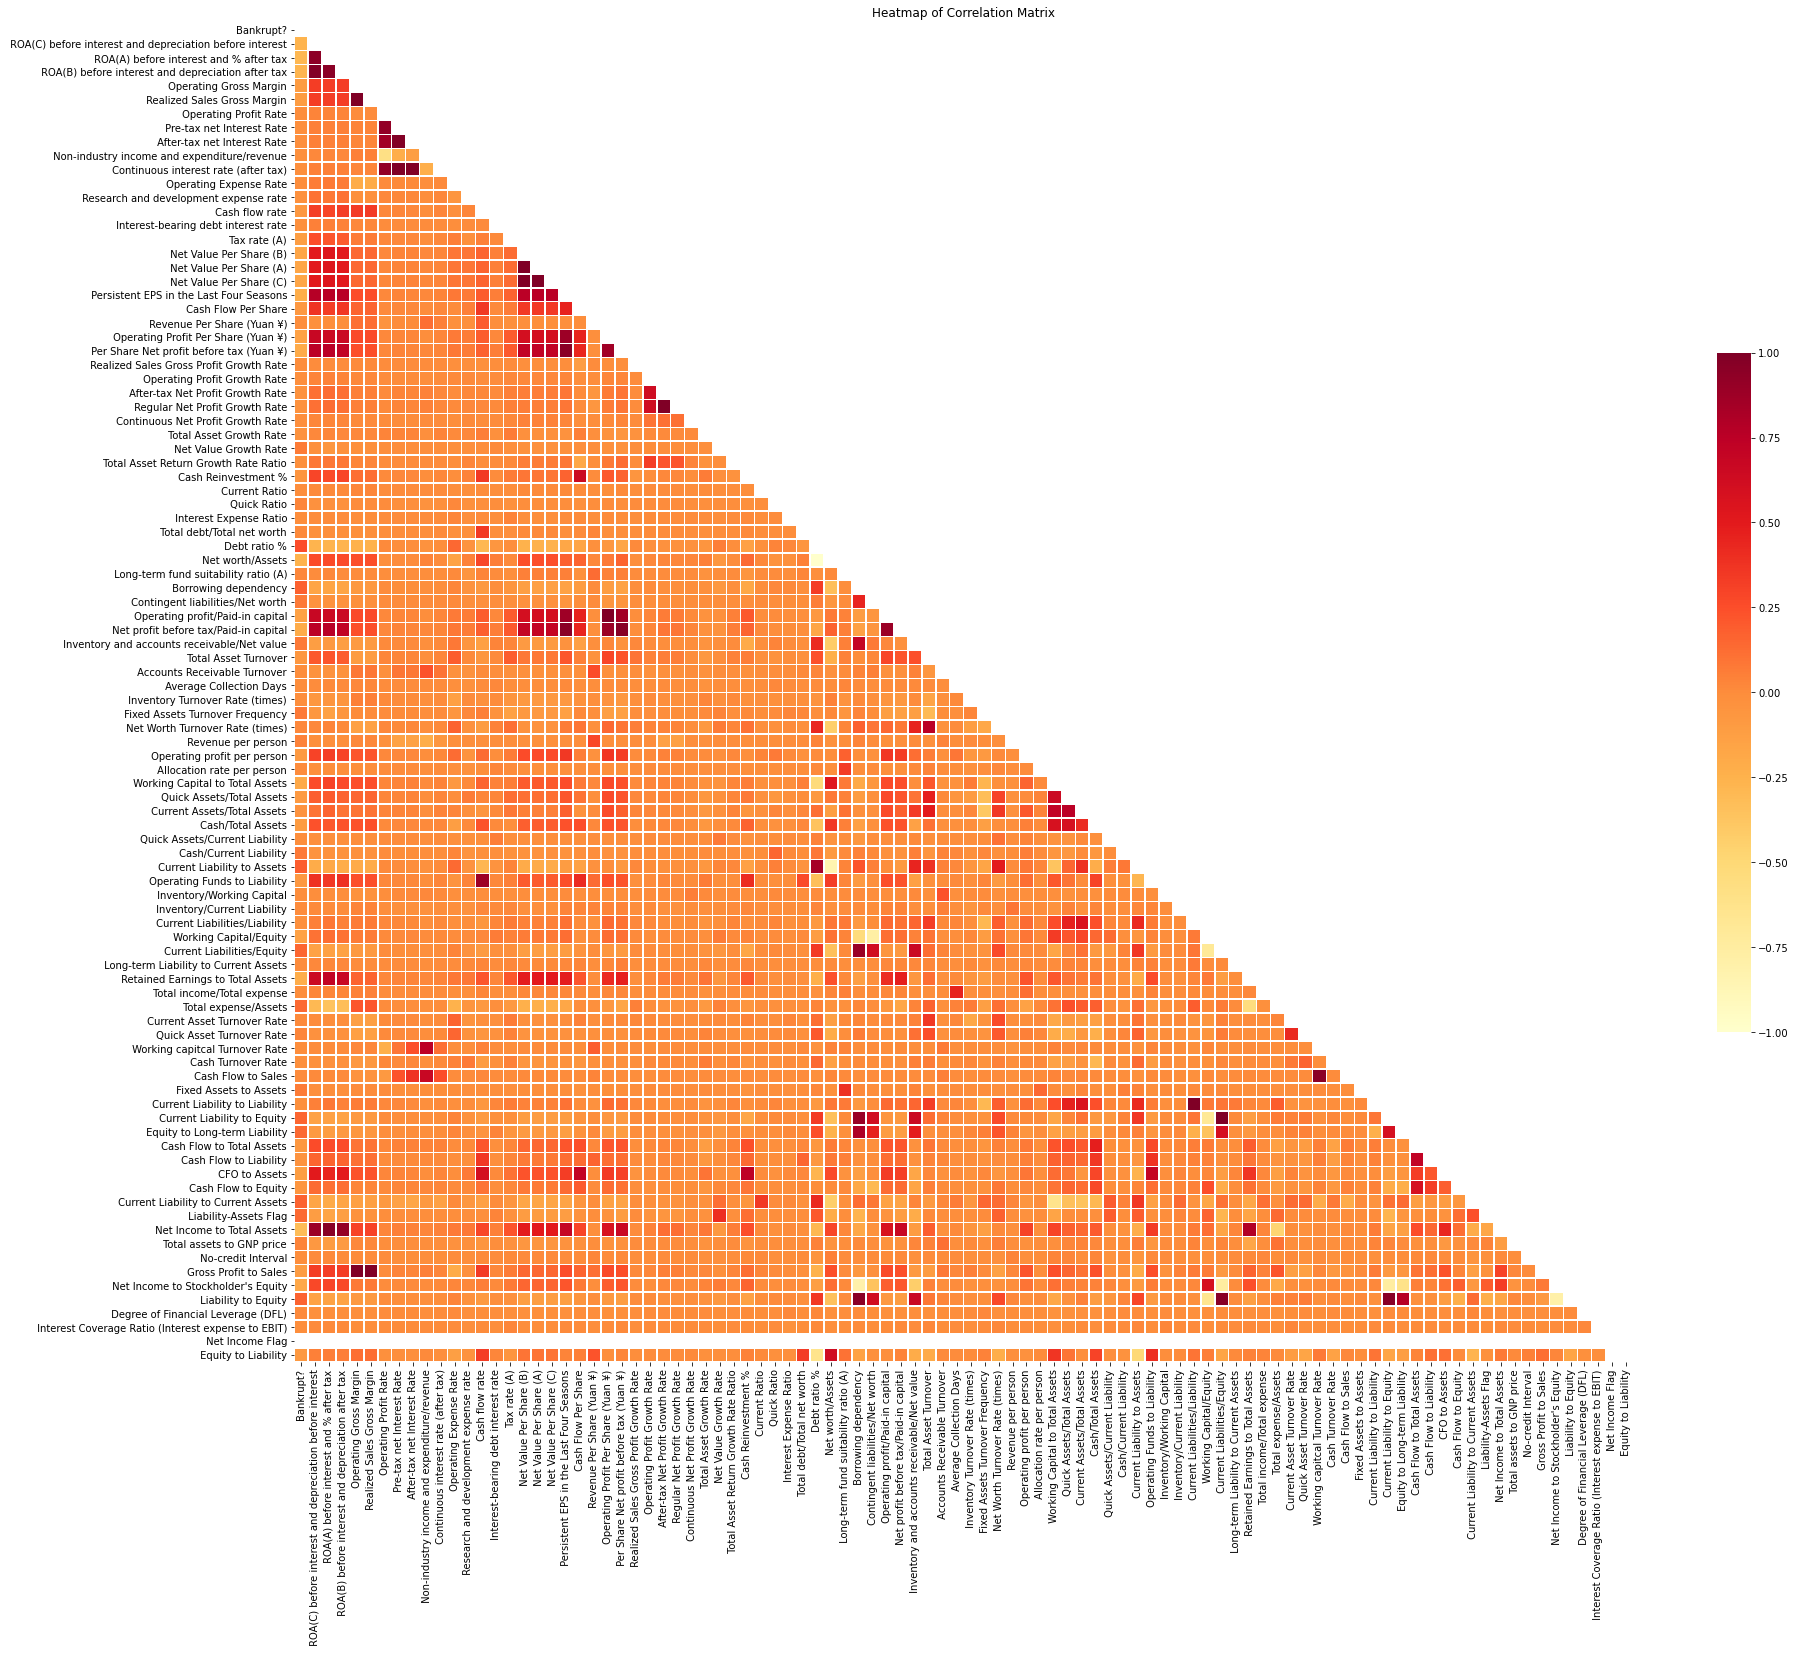

In [11]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(30,25))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
            ax=ax, cmap='YlOrRd', #annot=True, 
            center=0, vmin=-1, vmax=1, square=True,
            linewidths=.5, 
            cbar_kws={"shrink": .5})

ax.set_title("Heatmap of Correlation Matrix");


In [12]:
df.iloc[:, 94:95].value_counts()

 Net Income Flag
1                   6819
dtype: int64

- all values are 1 so we'll drop Net Income Flag

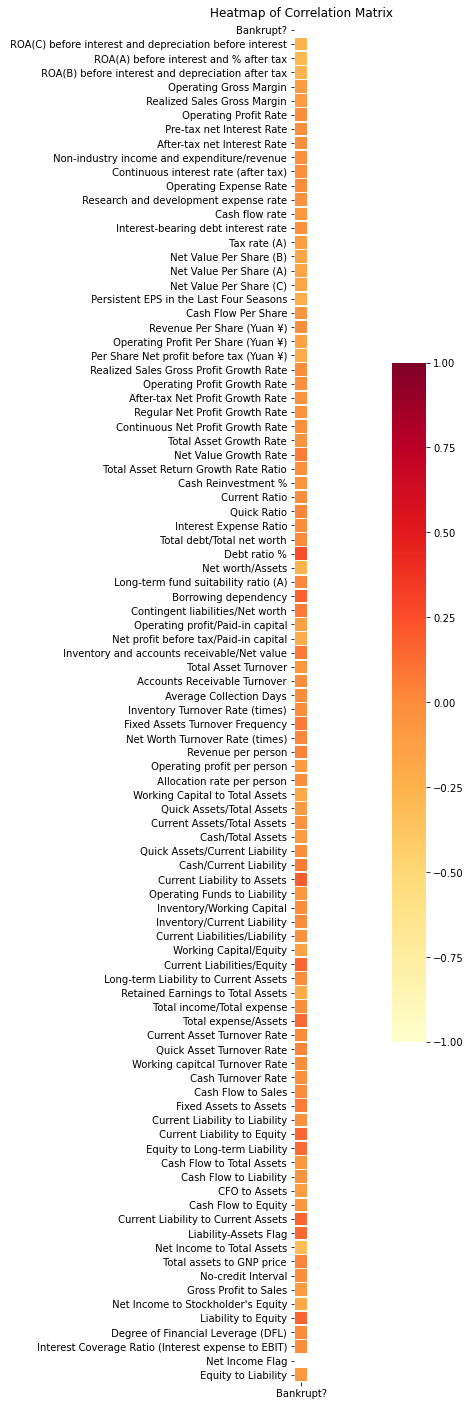

In [13]:
corr2 = df.corr()

fig, ax = plt.subplots(figsize=(30,25))

sns.heatmap(data=corr2[['Bankrupt?']], mask=np.triu(np.ones_like(corr2[['Bankrupt?']], dtype=bool)),
            ax=ax, cmap='YlOrRd', #annot=True, 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

ax.set_title("Heatmap of Correlation Matrix");


### Below we will extract the top 10 highly correlated features with Bankrupt?

In [14]:
top_cor_col = corr2[["Bankrupt?"]].apply(abs).sort_values('Bankrupt?', ascending=False).iloc[1:11,:].index
list(top_cor_col)


[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Net worth/Assets',
 ' Debt ratio %',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)']

#### The distributions of the top 10 correlated

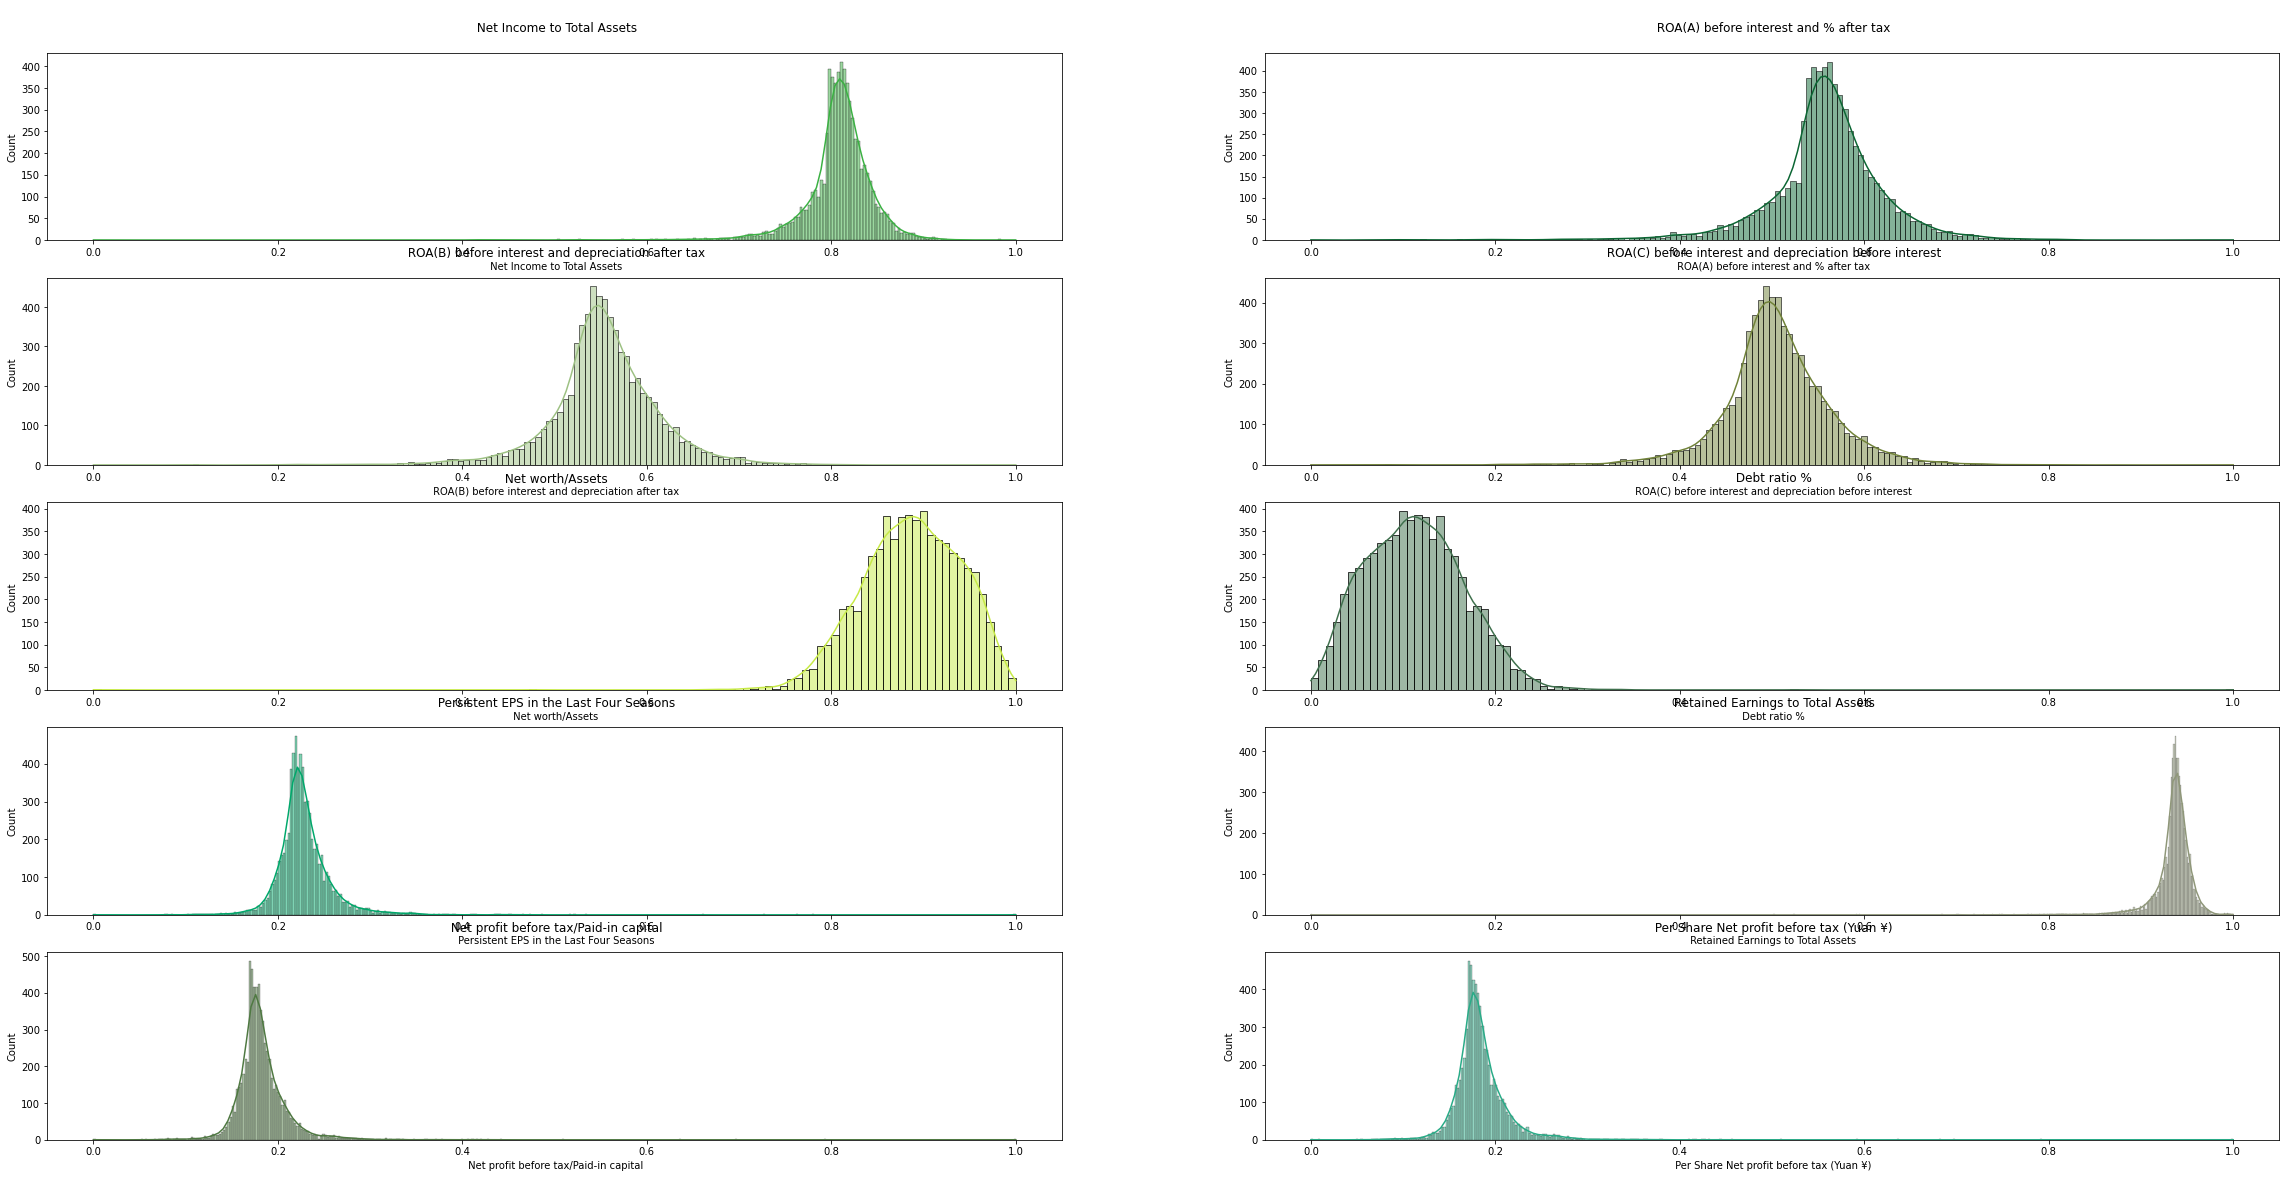

In [15]:
fig, ax = plt.subplots(figsize=(40,20), ncols=2, nrows=5)

colors = ['#3BB143', '#0B6633', '#9DC183', '#708238', '#C7EA46',
          '#3F704D', '#00A86B', '#8F9779', '#4F7942', '#29AB87']

for i, column in enumerate(df[list(top_cor_col)]):
    sns.histplot(df[column], ax=ax[i//2, i%2], kde=True, color=colors[i])
    ax[i//2, i%2].set_title('\n' + column + '\n')


#### Boxplot

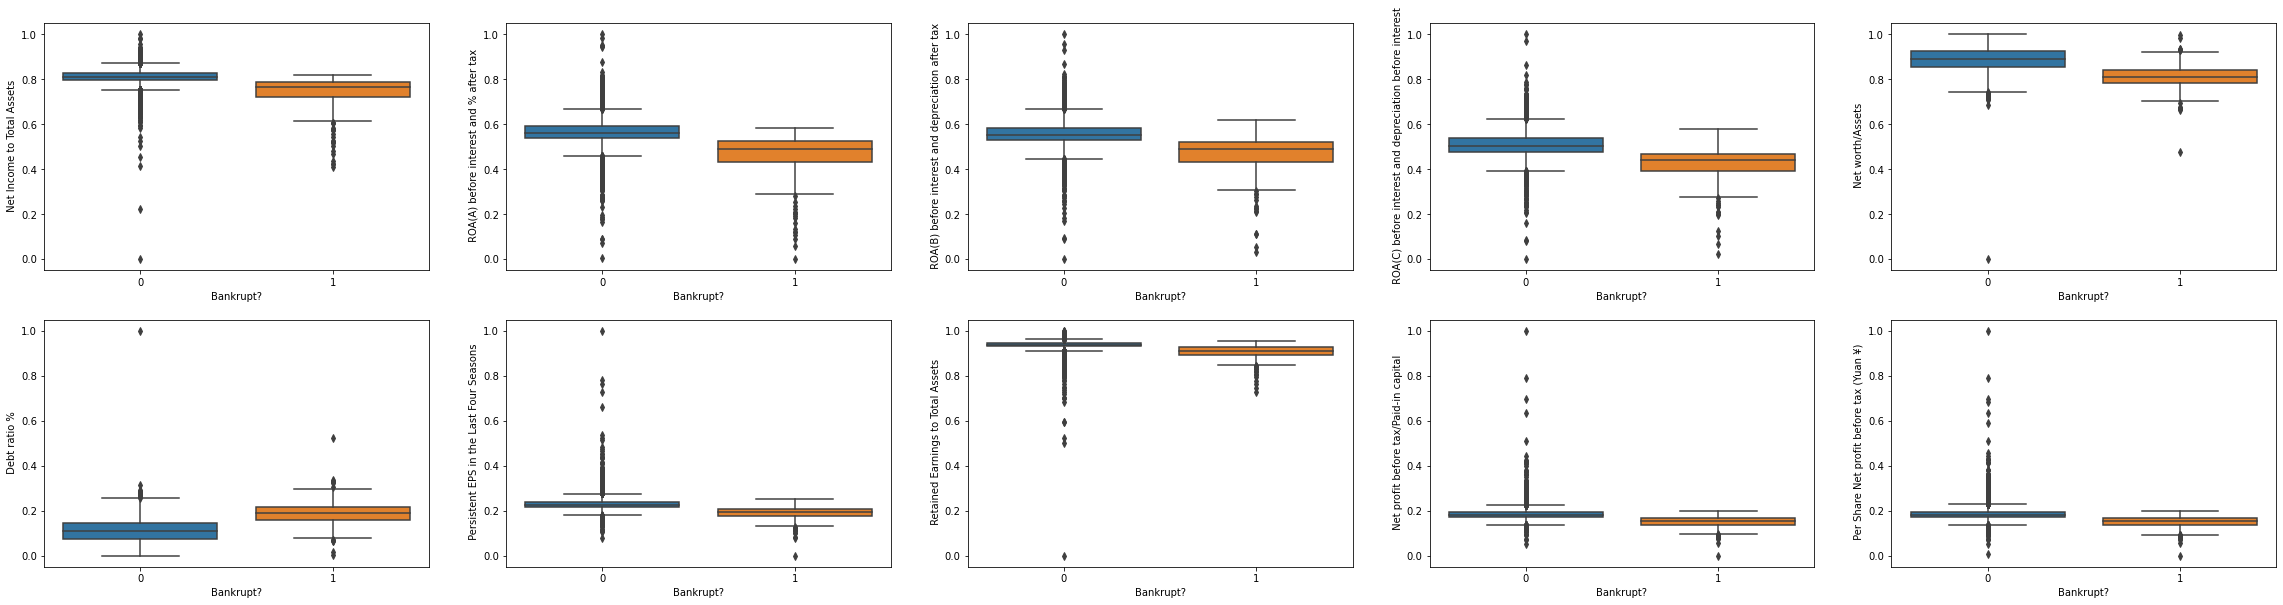

In [16]:
fig, ax = plt.subplots(figsize=(40, 10), ncols=5, nrows=2)

for i, col in enumerate(df[list(top_cor_col)]):
    sns.boxplot(x='Bankrupt?', y=col, data=df, ax=ax[i//5, i%5])


#### Distribution of the 10 features of 5 of the companies that went bankrupt

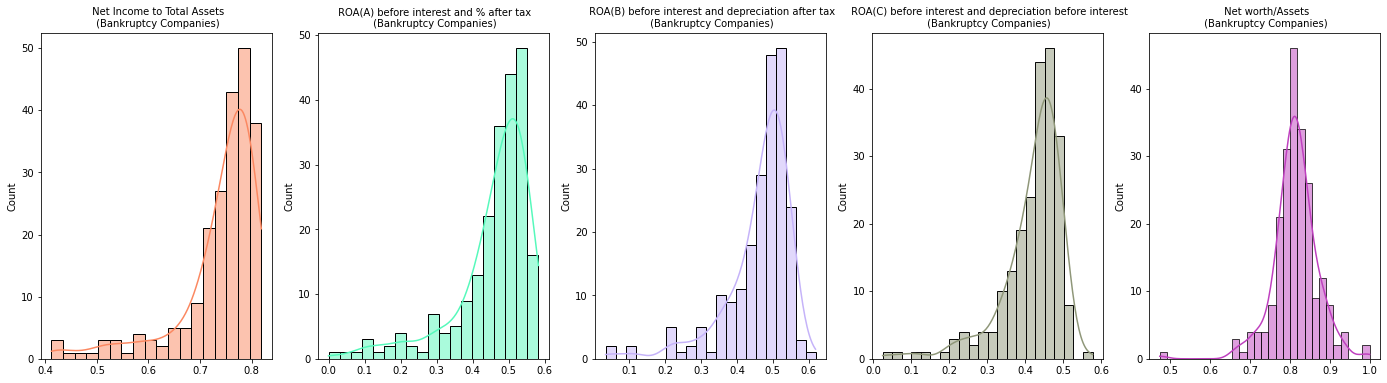

In [17]:
fig, ax = plt.subplots(1,5, figsize=(24, 6))
colors2 = ['#FB8861', '#56F9BB', '#C5B3F9', '#8F9779', '#bf40bf']

for i, col in enumerate(df[list(top_cor_col[:5])]):
    bankrupt = df[col].loc[df['Bankrupt?'] == 1].values
    sns.histplot(bankrupt, ax=ax[i], kde=True, color=colors2[i])
    ax[i].set_title(col + '\n (Bankruptcy Companies)', fontsize=10)


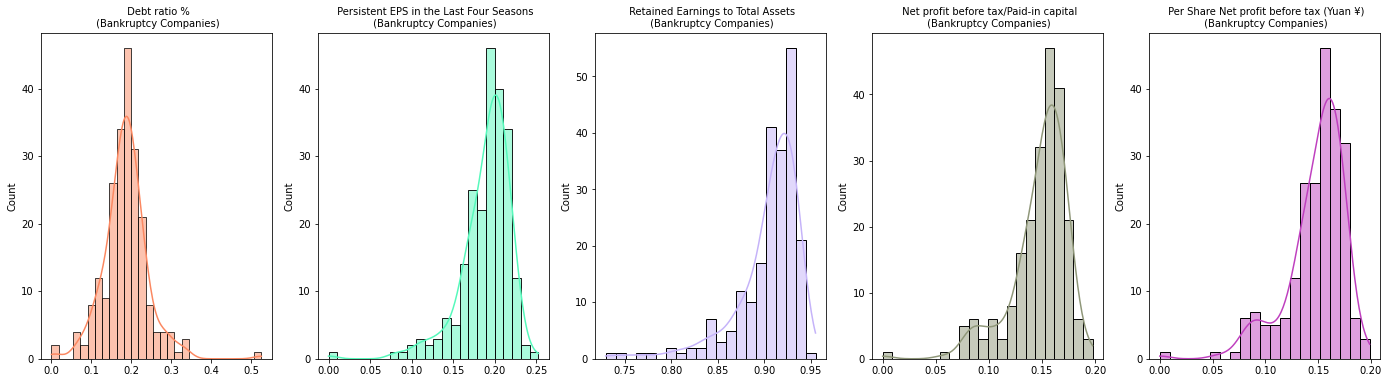

In [18]:
g, ax = plt.subplots(1,5, figsize=(24, 6))
colors2 = ['#FB8861', '#56F9BB', '#C5B3F9', '#8F9779', '#bf40bf']

for i, col in enumerate(df[list(top_cor_col[5:])]):
    bankrupt = df[col].loc[df['Bankrupt?'] == 1].values
    sns.histplot(bankrupt, ax=ax[i], kde=True, color=colors2[i])
    ax[i].set_title(col + '\n (Bankruptcy Companies)', fontsize=10)


### Splitting the Data

In [19]:
X = df.drop(['Bankrupt?', ' Net Income Flag'], axis=1)
y = df['Bankrupt?']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=4, 
                                                    stratify=y, 
                                                    test_size=.2)

#### Subsetting data into top 10 features

In [21]:
X_train_top_10 = X_train[top_cor_col]
X_test_top_10 = X_test[top_cor_col]

#### First logistic regression model with top 10 features

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

In [23]:
fsm_steps = [('ss', StandardScaler()),
             ('fsm', LogisticRegression(random_state=4))]

In [24]:
fsm_pipeline = Pipeline(fsm_steps)
fsm_pipeline.fit(X_train_top_10, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('fsm', LogisticRegression(random_state=4))])

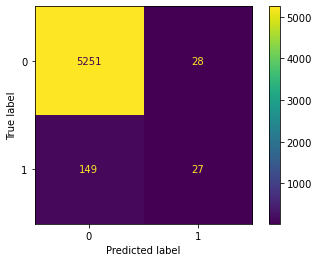

In [25]:
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(fsm_pipeline, X_train_top_10, y_train)

In [26]:
print(classification_report(y_train, fsm_pipeline.predict(X_train_top_10)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5279
           1       0.49      0.15      0.23       176

    accuracy                           0.97      5455
   macro avg       0.73      0.57      0.61      5455
weighted avg       0.96      0.97      0.96      5455



In [27]:
fsm_cv = cross_validate(fsm_pipeline, X_train_top_10, y_train, cv=5, n_jobs=-1, scoring=['neg_log_loss', 'roc_auc'])

In [28]:
fsm_cv

{'fit_time': array([0.16486621, 0.17981458, 0.15606904, 0.11498737, 0.16095519]),
 'score_time': array([0.04852915, 0.02298641, 0.02293849, 0.01695371, 0.03599691]),
 'test_neg_log_loss': array([-0.10205756, -0.08136359, -0.09789203, -0.09212828, -0.10510533]),
 'test_roc_auc': array([0.92186147, 0.9717803 , 0.91885823, 0.92770563, 0.91595577])}

We can observe that our scores are high due to the imbalance in our dataset.

In [29]:
from sklearn.metrics import roc_curve, plot_roc_curve, auc

In [30]:
fsm_score = fsm_pipeline.decision_function(X_train_top_10)
fpr_fsm, tpr_fsm, thresholds_fsm = roc_curve(y_train, fsm_score)
print('AUC: {}'.format(auc(fpr_fsm, tpr_fsm)))

AUC: 0.9330537808469235


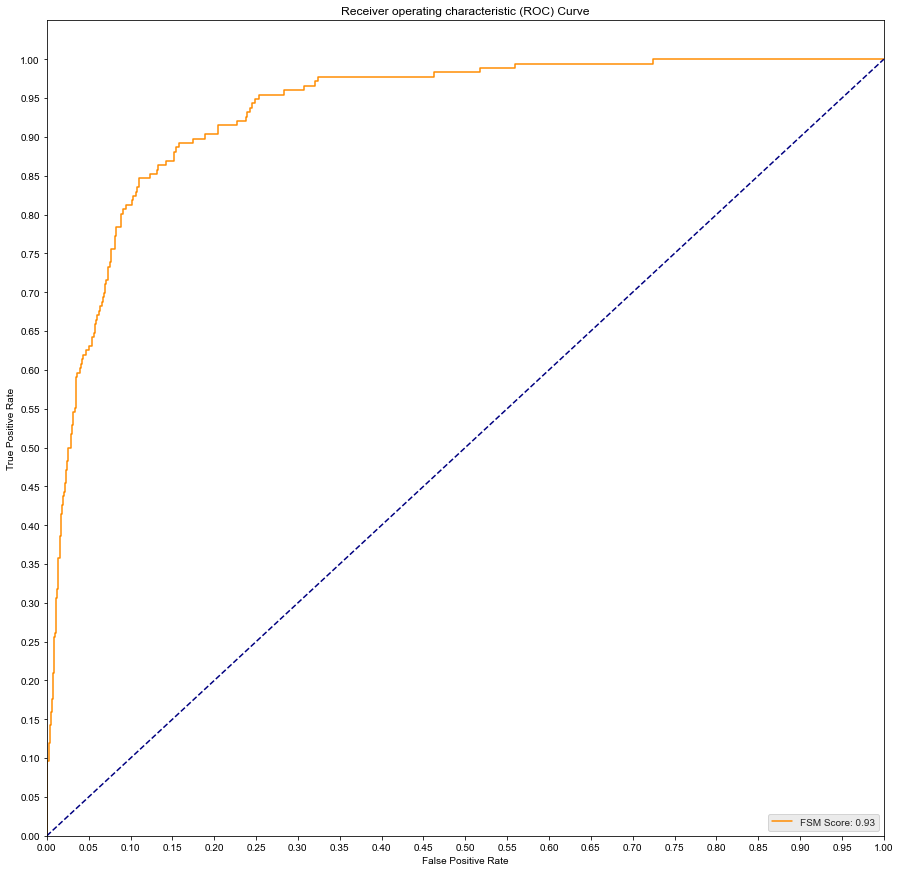

In [31]:
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_fsm, tpr_fsm, color='darkorange', label='FSM Score: {:.2f}'.format(auc(fpr_fsm, tpr_fsm)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 2nd model with features containing debt and liability

### eda
explore distributions for all and then across the target
max/min
peep variances
describe what the columns mean - currency? unpack it
check for patterns
encoding errors
zeros?
imbalance?


In [32]:
matches = ["debt", "liability", "liabilities", "cash"]
debt_col = [col for col in df.columns if any(x in col.lower() for x in matches)]
debt_col

[' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Cash Flow Per Share',
 ' Cash Reinvestment %',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Contingent liabilities/Net worth',
 ' Cash/Total Assets',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Current Liability to Assets',
 ' Operating Funds to Liability',
 ' Inventory/Current Liability',
 ' Current Liabilities/Liability',
 ' Current Liabilities/Equity',
 ' Long-term Liability to Current Assets',
 ' Cash Turnover Rate',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Equity to Long-term Liability',
 ' Cash Flow to Total Assets',
 ' Cash Flow to Liability',
 ' Cash Flow to Equity',
 ' Current Liability to Current Assets',
 ' Liability-Assets Flag',
 ' Liability to Equity',
 ' Equity to Liability']

In [33]:
X_train_debt = X_train[debt_col]
X_test_debt = X_test[debt_col]

In [34]:
debt_steps = [('ss', StandardScaler()),
             ('debt', LogisticRegression(random_state=4))]

In [35]:
debt_pipeline = Pipeline(debt_steps)
debt_pipeline.fit(X_train_debt, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('debt', LogisticRegression(random_state=4))])

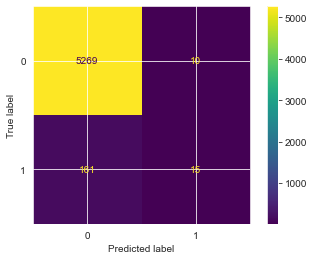

In [36]:
plot_confusion_matrix(debt_pipeline, X_train_debt, y_train)

In [37]:
print(classification_report(y_train, debt_pipeline.predict(X_train_debt)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5279
           1       0.60      0.09      0.15       176

    accuracy                           0.97      5455
   macro avg       0.79      0.54      0.57      5455
weighted avg       0.96      0.97      0.96      5455



In [38]:
debt_cv = cross_validate(debt_pipeline, X_train_debt, y_train, cv=5, n_jobs=-1, scoring=['neg_log_loss', 'roc_auc'])
debt_cv

{'fit_time': array([0.34315276, 0.29840708, 0.42593527, 0.32482815, 0.33083677]),
 'score_time': array([0.03291273, 0.03490567, 0.08405113, 0.03305149, 0.03709269]),
 'test_neg_log_loss': array([-0.13272469, -0.12216243, -0.15654281, -0.09578188, -0.13704387]),
 'test_roc_auc': array([0.82581169, 0.84788961, 0.8659632 , 0.90941558, 0.8563981 ])}

In [39]:
debt_score = debt_pipeline.decision_function(X_train_debt)
fpr_debt, tpr_debt, thresholds_debt = roc_curve(y_train, debt_score)
print('AUC: {}'.format(auc(fpr_debt, tpr_debt)))

AUC: 0.8886938383647041


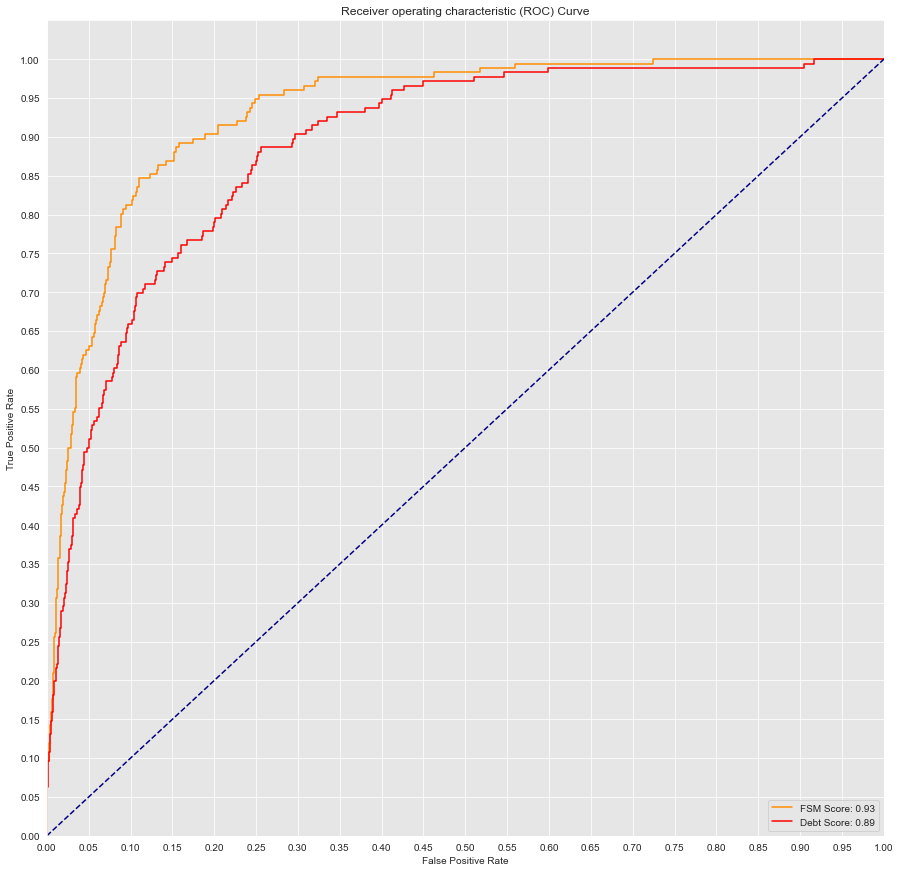

In [40]:
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_fsm, tpr_fsm, color='darkorange', label='FSM Score: {:.2f}'.format(auc(fpr_fsm, tpr_fsm)))
ax.plot(fpr_debt, tpr_debt, color='red', label='Debt Score: {:.2f}'.format(auc(fpr_debt, tpr_debt)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 3rd model with over and under sampling with top 10 features

In [41]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [42]:
over_steps = [('smote', SMOTE(random_state=4)),
             ('ss', StandardScaler()),
             ('over', LogisticRegression(random_state=4))]

under_steps = [('undie', RandomUnderSampler(random_state=4)),
              ('ss', StandardScaler()),
              ('under', LogisticRegression(random_state=4))]

In [43]:
over_pipeline = imbpipeline(over_steps)
under_pipeline = imbpipeline(under_steps)


In [44]:
stratified_kfold = StratifiedKFold(n_splits=5,
                                  shuffle=True,
                                  random_state=4)

In [45]:
over_param_grid = {'over__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'over__penalty':['l2', 'l1', 'elasticnet', 'none']}

under_param_grid = {'under__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'under__penalty':['l2', 'l1', 'elasticnet', 'none']}


In [46]:
over_grid_search = GridSearchCV(estimator=over_pipeline,
                          param_grid=over_param_grid,
                          scoring=['roc_auc', 'neg_log_loss', 'f1'],
                          cv=stratified_kfold,
                          n_jobs=-1)

In [50]:
under_grid_search = GridSearchCV(estimator=under_pipeline,
                          param_grid=under_param_grid,
                          scoring=['roc_auc', 'neg_log_loss', 'f1'],
                          cv=stratified_kfold,
                          n_jobs=-1,
                          refit='f1')

In [51]:
over_grid_search.fit(X_train_top_10, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=4)),
                                       ('ss', StandardScaler()),
                                       ('over',
                                        LogisticRegression(random_state=4))]),
             n_jobs=-1,
             param_grid={'over__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'over__penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='roc_auc')

In [52]:
under_grid_search.fit(X_train_top_10, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('undie',
                                        RandomUnderSampler(random_state=4)),
                                       ('ss', StandardScaler()),
                                       ('under',
                                        LogisticRegression(random_state=4))]),
             n_jobs=-1,
             param_grid={'under__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'under__penalty': ['l2', 'l1', 'elasticnet', 'none']},
             refit='f1', scoring=['roc_auc', 'neg_log_loss', 'f1'])

In [53]:
under_grid_search.best_params_

{'under__C': 0.001, 'under__penalty': 'l2'}

In [55]:
under_grid_search.__dict__

{'scoring': ['roc_auc', 'neg_log_loss', 'f1'],
 'estimator': Pipeline(steps=[('undie', RandomUnderSampler(random_state=4)),
                 ('ss', StandardScaler()),
                 ('under', LogisticRegression(random_state=4))]),
 'n_jobs': -1,
 'iid': 'deprecated',
 'refit': 'f1',
 'cv': StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'under__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'under__penalty': ['l2', 'l1', 'elasticnet', 'none']},
 'multimetric_': True,
 'best_index_': 0,
 'best_score_': 0.31770359408192517,
 'best_params_': {'under__C': 0.001, 'under__penalty': 'l2'},
 'best_estimator_': Pipeline(steps=[('undie', RandomUnderSampler(random_state=4)),
                 ('ss', StandardScaler()),
                 ('under', LogisticRegression(C=0.001, random_state=4))]),
 'refit_time_': 0.07169246673583984,
 'scorer_': {'roc_auc': make_scorer(roc_auc_score, 

In [ ]:
{'under__C': 0.001, 'under__penalty': 'l1'}

In [72]:
logreg_nan = LogisticRegression(penalty='l1', C=0.001, random_state=4)

In [73]:
logreg_nan.fit(X_train_top_10, y_train)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

## f1 score good for class imbalance <--- this the one
- log loss can be informative for probabalistic 
- 

In [57]:
over_cv_score = over_grid_search.best_score_
print(f'Over Cross-validation score: {over_cv_score}')

Over Cross-validation score: 0.9321317268829116


In [58]:
under_cv_score = under_grid_search.best_score_
print(f'Under Cross-validation score: {under_cv_score}')

Under Cross-validation score: 0.31770359408192517


In [59]:
over_grid_search.best_params_

{'over__C': 0.001, 'over__penalty': 'l2'}

In [60]:
over_score = over_grid_search.decision_function(X_train_top_10)
fpr_over, tpr_over, thresholds_over = roc_curve(y_train, over_score)
print('Over AUC: {}'.format(auc(fpr_over, tpr_over)))

Over AUC: 0.9321582944428181


In [61]:
under_score = under_grid_search.decision_function(X_train_top_10)
fpr_under, tpr_under, thresholds_under = roc_curve(y_train, under_score)
print('Under AUC: {}'.format(auc(fpr_under, tpr_under)))

Under AUC: 0.9278100191151906


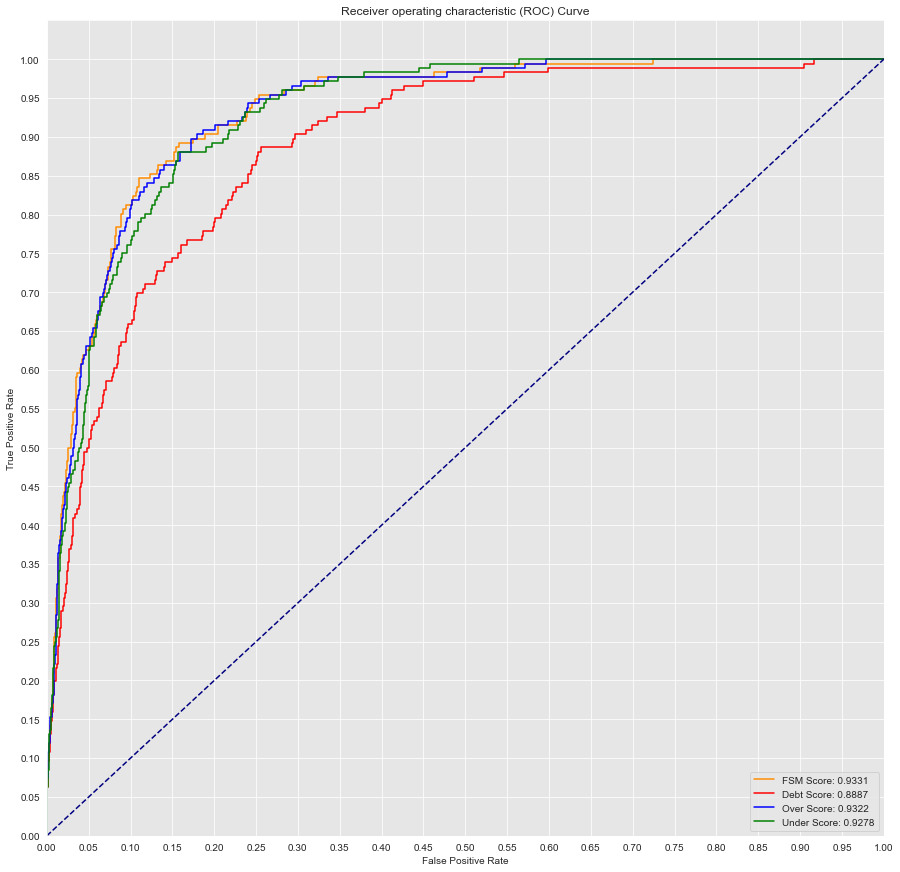

In [62]:
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_fsm, tpr_fsm, color='darkorange', label='FSM Score: {:.4f}'.format(auc(fpr_fsm, tpr_fsm)))
ax.plot(fpr_debt, tpr_debt, color='red', label='Debt Score: {:.4f}'.format(auc(fpr_debt, tpr_debt)))
ax.plot(fpr_over, tpr_over, color='blue', label='Over Score: {:.4f}'.format(auc(fpr_over, tpr_over)))
ax.plot(fpr_under, tpr_under, color='green', label='Under Score: {:.4f}'.format(auc(fpr_under, tpr_under)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Fourth model with all predictors using our best parameters and under sampling

In [63]:
all_steps = [('undie', RandomUnderSampler(random_state=4)),
              ('ss', StandardScaler()),
              ('all', LogisticRegression(random_state=4, C=0.1))]

In [64]:
all_pipeline = imbpipeline(all_steps)

In [65]:
all_pipeline.fit(X_train, y_train)

Pipeline(steps=[('undie', RandomUnderSampler(random_state=4)),
                ('ss', StandardScaler()),
                ('all', LogisticRegression(C=0.1, random_state=4))])

In [66]:
all_cv = cross_validate(all_pipeline, X_train, y_train, scoring=['roc_auc', 'neg_log_loss'], cv=stratified_kfold, n_jobs=-1)

In [67]:
all_cv

{'fit_time': array([0.14597321, 0.12192702, 0.15302277, 0.11904645, 0.10680771]),
 'score_time': array([0.04022598, 0.06097198, 0.03217649, 0.03197312, 0.05908132]),
 'test_roc_auc': array([0.90549242, 0.89788961, 0.92624459, 0.91277056, 0.92153765]),
 'test_neg_log_loss': array([-0.50274232, -0.41404219, -0.44890613, -0.342047  , -0.40806812])}

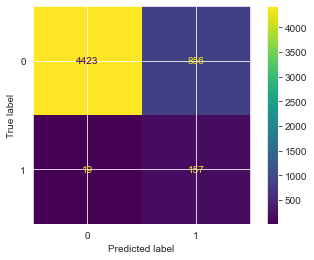

In [68]:
plot_confusion_matrix(all_pipeline, X_train, y_train)

In [69]:
all_score = all_pipeline.decision_function(X_train)
fpr_all, tpr_all, thresholds_all = roc_curve(y_train, all_score)
print('All AUC: {}'.format(auc(fpr_all, tpr_all)))

All AUC: 0.9348479825724569


In [70]:
print(classification_report(y_train, all_pipeline.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      5279
           1       0.15      0.89      0.26       176

    accuracy                           0.84      5455
   macro avg       0.58      0.86      0.59      5455
weighted avg       0.97      0.84      0.89      5455



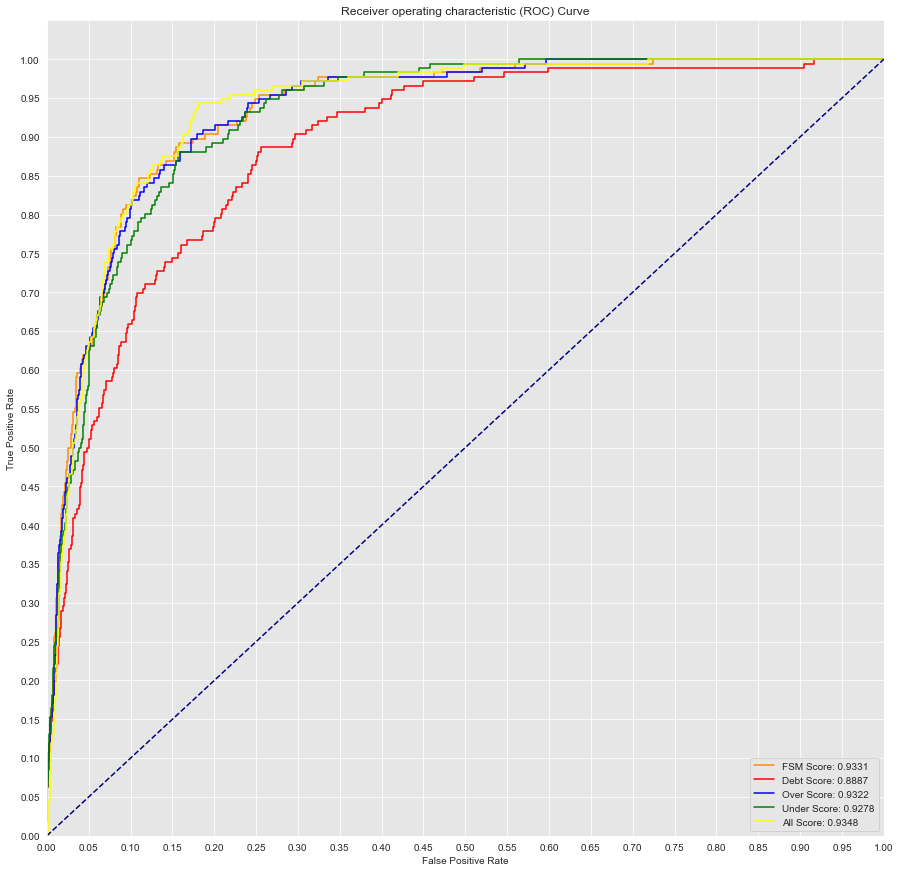

In [71]:
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_fsm, tpr_fsm, color='darkorange', label='FSM Score: {:.4f}'.format(auc(fpr_fsm, tpr_fsm)))
ax.plot(fpr_debt, tpr_debt, color='red', label='Debt Score: {:.4f}'.format(auc(fpr_debt, tpr_debt)))
ax.plot(fpr_over, tpr_over, color='blue', label='Over Score: {:.4f}'.format(auc(fpr_over, tpr_over)))
ax.plot(fpr_under, tpr_under, color='green', label='Under Score: {:.4f}'.format(auc(fpr_under, tpr_under)))
ax.plot(fpr_all, tpr_all, color='yellow', label='All Score: {:.4f}'.format(auc(fpr_all, tpr_all)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### NEXT TREEEEEEEEES and xgboost

In [14]:
abcdefg

NameError: name 'abcdefg' is not defined

In [ ]:
matches = ["debt", "liability", "liabilities", "cash"]
debt_col = [col for col in df.columns if any(x in col.lower() for x in matches)]
debt_col

In [ ]:
debt_df = df[debt_col]

In [ ]:
debt_df = pd.concat([y, debt_df], axis=1)

In [ ]:
mms_debt_df

### Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

### Importing Oversampling and Undersampling using RandomOver/UnderSampler

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#try all of the under/over sampling techniques

In [ ]:
#sm = SMOTE(random_state=8)
#X_t_overasmpled, y_t_overasmpled = sm.fit_resample(X_train_scaled, y_train)

# max notes

In [ ]:
# fin
#do eda and find out what the best features are 1st
#@@@@@@ more data understanding @@@@@@@@
#adjust class weights in algorithm
#try all of the under/over sampling techniques then try them all
#from imblearn.undersampling and oversampling #to make the majority smaller
#try different ratios in smote -default is 1:1 - try alternative ratios IN CV
#what is the most costly error
#is fp or fn more important - minimize fn 
# score="negative_log_loss"
#lasso regularization to zero out features and then use those selected features in other modls
#look at training and validation scores


### Pipeline for First Baseline Logistic Regression Model

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.linear_model import LogisticRegression
model_list = {}

In [ ]:
base_steps_u = [('u', RandomUnderSampler(sampling_strategy=.5)),
                 ('ss', StandardScaler()),
                 ('logreg', LogisticRegression(random_state=4))]

base_steps_o = [('o', RandomOverSampler(sampling_strategy=.1)),
                 ('ss', StandardScaler()),
                 ('logreg', LogisticRegression(random_state=4))]

base_steps_both = [('o', RandomOverSampler(sampling_strategy=.1)),
                   ('u', RandomUnderSampler(sampling_strategy=.5)),
                   ('ss', StandardScaler()),
                   ('logreg', LogisticRegression(random_state=4))]


In [ ]:
pipeline_base_u = imbpipeline(base_steps_u)

pipeline_base_o = imbpipeline(base_steps_o)

pipeline_base_both = imbpipeline(base_steps_both)

In [ ]:
pipeline_base_u.fit(X_train, y_train)
pipeline_base_o.fit(X_train, y_train)
pipeline_base_both.fit(X_train, y_train)


### Observing the Results of the First Baseline Logistic Regression Model

In [ ]:
print(f'Under: {pipeline_base_u.score(X_train, y_train)}')
print(f'Over: {pipeline_base_o.score(X_train, y_train)}')
print(f'Both: {pipeline_base_both.score(X_train, y_train)}')

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(pipeline_base, X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pipeline_base_preds = pipeline_base.predict(X_train)

In [ ]:
print(classification_report(y_train, pipeline_base_preds))

In [ ]:
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
#y_score = logreg.fit(X_train, y_train).decision_function(X_test)

#fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [ ]:
base_y_score = pipeline_base.decision_function(X_test)

In [ ]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, base_y_score)

In [ ]:
print('AUC: {}'.format(auc(fpr_base, tpr_base)))

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_base, tpr_base, color='darkorange', label='Baseline Score: {:.2f}'.format(auc(fpr_base, tpr_base)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Implementing GridSearch into our Model

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=3,
                                  shuffle=True,
                                  random_state=4)

In [ ]:
param_grid = {'logreg__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'logreg__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'logreg__penalty':['l2', 'l1', 'elasticnet', 'none']}

In [ ]:
grid_search = GridSearchCV(estimator=pipeline_base,
                          param_grid=param_grid,
                          scoring='roc_auc', #max recs log loss scoring but can do either and both
                          cv=stratified_kfold,
                          n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
cv_score = grid_search.best_score_
print(f'Cross-validation score: {cv_score}')

In [ ]:
grid_search.__dict__

In [ ]:
best_param = grid_search.best_params_

In [ ]:
print(f'Best base parameter: {best_param}')

In [ ]:
model_list['basemodel'] = pipeline_base

#### 2nd model

In [ ]:
lr_steps = [('sm', SMOTE(random_state=4)),
         ('ss', StandardScaler()),
         ('logreg', LogisticRegression(random_state=4, C=.001, solver='liblinear'))]

In [ ]:
pipeline_lr = imbpipeline(lr_steps)

In [ ]:
pipeline_lr.fit(X_train, y_train)

In [ ]:
pipeline_lr.score(X_train, y_train)

In [ ]:
model_list['lr'] = pipeline_lr

In [ ]:
model_list

In [ ]:
lr_y_score = pipeline_lr.decision_function(X_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_y_score)
print('AUC: {}'.format(auc(fpr_lr, tpr_lr)))

In [ ]:
import seaborn as sns
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_base, tpr_base, color='darkorange', label='Baseline Score: {:.2f}'.format(auc(fpr_base, tpr_base)))
ax.plot(fpr_lr, tpr_lr, color='red', label='Grid Search LR Score: {:.2f}'.format(auc(fpr_lr, tpr_lr)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 3rd model - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dt_steps = [('sm', SMOTE(random_state=4)),
                       ('dtree', DecisionTreeClassifier(random_state=4))]
                       

In [ ]:
pipeline_dt = imbpipeline(dt_steps)

In [ ]:
dt_param_grid = {'dtree__criterion':['gini', 'entropy'], 
              'dtree__splitter':['best', 'random'],
              'dtree__max_depth':[2,4,6,8,10,12]}

In [ ]:
dt_grid_search = GridSearchCV(estimator=pipeline_dt,
                          param_grid=dt_param_grid,
                          scoring='roc_auc',
                          cv=stratified_kfold,
                          n_jobs=-1)

In [ ]:
dt_grid_search.fit(X_train, y_train)

In [ ]:
dt_grid_search.score(X_train, y_train)

In [ ]:
dt_grid_search.__dict__

In [ ]:
dt_best_params = dt_grid_search.best_params_
print(f'Best decision tree parameters: {dt_best_params}')

In [ ]:
dt_best_score = dt_grid_search.best_score_
print(f'Decision Tree best score: {dt_best_score}')

In [ ]:
dt_grid_search.best_estimator_

In [ ]:
#dt_model = Decisio….(**best_params)


### Random over and undersampling

In [ ]:
over = RandomOverSampler(sampling_strategy='auto', random_state=8)
under = RandomUnderSampler(sampling_strategy='auto', random_state=8)
over_under_dt_steps = (('over', over), ('under', under), ('dtree', dtree))